In [324]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
# 设置中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300

In [325]:
"""
导入数据
"""
data = pd.read_excel('生活习惯.xlsx',sheet_name='Sheet2')
data

,是否吸烟,是否饮酒,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃中餐,在家吃晚餐,...,每日水果食用量,每日奶制品使用量,每天摄入鱼禽、蛋类和瘦肉的量,每天摄入油的量,每天摄入盐的量,是否吃小麦面粉,是否吃薯类,是否吃油炸面食,是否吃内脏类,是否吃豆浆
0,0.0,0.0,1951,2,4,2.0,11.0,NaN,7.0,7.0,...,1000.000000,171.000000,62.857143,6.0,10.0,1.0,1.0,2.0,2.0,1.0
1,0.0,0.0,1950,2,2,2.0,1.0,NaN,7.0,7.0,...,300.000000,285.714286,147.857143,7.0,15.0,1.0,1.0,2.0,2.0,1.0
2,1.0,1.0,1944,2,3,2.0,11.0,NaN,7.0,7.0,...,28.571429,35.714286,184.142857,6.0,20.0,2.0,2.0,2.0,2.0,2.0
3,0.0,1.0,1945,2,2,2.0,11.0,NaN,7.0,7.0,...,100.000000,400.000000,207.142857,8.0,6.0,1.0,1.0,2.0,1.0,1.0
4,1.0,1.0,1961,2,4,2.0,1.0,NaN,2.0,6.0,...,14.285714,0.000000,47.142857,3.0,5.0,1.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7831,1.0,1.0,1979,1,3,2.0,4.0,NaN,7.0,7.0,...,100.000000,192.857143,124.285714,10.0,12.0,1.0,1.0,2.0,2.0,1.0
7832,0.0,0.0,1956,2,3,2.0,1.0,1.0,7.0,7.0,...,400.000000,107.142857,462.857143,15.0,20.0,1.0,1.0,2.0,2.0,1.0
7833,1.0,1.0,1969,1,3,2.0,2.0,NaN,7.0,7.0,...,300.000000,107.142857,425.971429,5.0,10.0,2.0,1.0,2.0,2.0,1.0
7834,0.0,1.0,1966,1,4,2.0,12.0,NaN,5.0,6.0,...,500.000000,321.428571,232.971429,4.0,10.0,1.0,1.0,2.0,1.0,2.0


In [326]:
"""
年龄处理
"""
#将出生年转换为年龄
data['出生年'] = 2023 - data['出生年']
data.rename(columns={'出生年':'年龄'},inplace=True)


In [327]:
"""
不吃早餐的处理
"""
# 缺失值用0
data['不吃早餐'].fillna(0,inplace=True)

In [328]:
"""
在家吃中餐的处理
"""
# 缺失值用0
data['在家吃中餐'].fillna(0,inplace=True)

In [329]:
"""
在家吃晚餐的处理
"""
data['在家吃晚餐'].fillna(0,inplace=True)

In [330]:
"""
是否参加体育锻炼的处理
"""
# 缺失值用0
data['是否参加体育锻炼'].fillna(0,inplace=True)
# 如果值为1 改为0
data['是否参加体育锻炼'] = data['是否参加体育锻炼'].apply(lambda x:0 if x==1 else x)

In [331]:
"""
参加体育锻炼的强度处理
"""
# 缺失值用0
data['体育锻炼的强度'].fillna(0,inplace=True)

In [332]:
""""
有没有被社区或以上医院的医生诊断过患有高血压
"""
# 缺失值用0
data['有没有被社区或以上医院的医生诊断过患有高血压'].fillna(0,inplace=True)
# 如果是2 改为0
data['有没有被社区或以上医院的医生诊断过患有高血压'] = data['有没有被社区或以上医院的医生诊断过患有高血压'].apply(lambda x:0 if x==2 else x)

In [333]:
"""
您有没有被社区或以上医院的医生诊断患有糖尿病
"""
# 缺失值用0
data['您有没有被社区或以上医院的医生诊断患有糖尿病'].fillna(0,inplace=True)
# 如果是2 改为0
data['您有没有被社区或以上医院的医生诊断患有糖尿病'] = data['您有没有被社区或以上医院的医生诊断患有糖尿病'].apply(lambda x:0 if x==2 else x)

In [334]:
'''
平均每天体育锻炼时间
'''
# 如果"是否参加体育锻炼"不为0,并且平均每天体育锻炼时间是缺失值,那么用平均值代替
data['平均每天体育锻炼时间'] = data.apply(lambda x:np.mean(data['平均每天体育锻炼时间']) if x['是否参加体育锻炼']!=0 and np.isnan(x['平均每天体育锻炼时间']) else x['平均每天体育锻炼时间'],axis=1)
# 其他缺失值改为0
data['平均每天体育锻炼时间'].fillna(0,inplace=True)

In [335]:
"""
是否吃小麦面粉,2改为0
"""
data['是否吃小麦面粉'] = data['是否吃小麦面粉'].apply(lambda x:0 if x==2 else x)
# 其他也是这样处理
data['是否吃薯类'] = data['是否吃薯类'].apply(lambda x:0 if x==2 else x)
data['是否吃油炸面食'] = data['是否吃油炸面食'].apply(lambda x:0 if x==2 else x)
data['是否吃内脏类'] = data['是否吃内脏类'].apply(lambda x:0 if x==2 else x)
data['是否吃豆浆'] = data['是否吃豆浆'].apply(lambda x:0 if x==2 else x)

C:\Users\44279\PycharmProjects\pythonproject\venv\lib\site-packages\lightgbm\engine.py:577: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\44279\PycharmProjects\pythonproject\venv\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	cv_agg's auc: 0.80637 + 0.0202792
[2]	cv_agg's auc: 0.807651 + 0.0213557
[3]	cv_agg's auc: 0.817013 + 0.0113833
[4]	cv_agg's auc: 0.817106 + 0.0110527
[5]	cv_agg's auc: 0.817354 + 0.0100142
[6]	cv_agg's auc: 0.823696 + 0.00880736
[7]	cv_agg's auc: 0.825335 + 0.00874236
[8]	cv_agg's auc: 0.825737 + 0.00927731
[9]	cv_agg's auc: 0.827023 + 0.00850645
[10]	cv_agg's auc: 0.827451 + 0.00883432
[11]	cv_agg's auc: 0.828709 + 0.00866797
[12]	cv_agg's auc: 0.829198 + 0.00879381
[13]	cv_agg's auc: 0.829778 + 0.00893771
[14]	cv_agg's auc: 0.830126 + 0.00920878
[15]	cv_agg's auc: 0.830627 + 0.00919997
[16]	cv_agg's auc: 0.830783 + 0.00904523
[17]	cv_agg's auc: 0.830926 + 0.00956857
[18]	cv_agg's auc: 0.830463 + 0.00948208
[19]	cv_agg's auc: 0.831053 + 0.00920038
[20]	cv_agg's auc: 0.831095 + 0.00929514
[21]	cv_agg's auc: 0.831784 + 0.00892209
[22]	cv_agg's auc: 0.831666 + 0.00913255
[23]	cv_agg's auc: 0.83209 + 0.00904801
[24]	cv_agg's auc: 0.832153 + 0.00943347
[25]	cv_agg's auc: 0.832353 + 0.

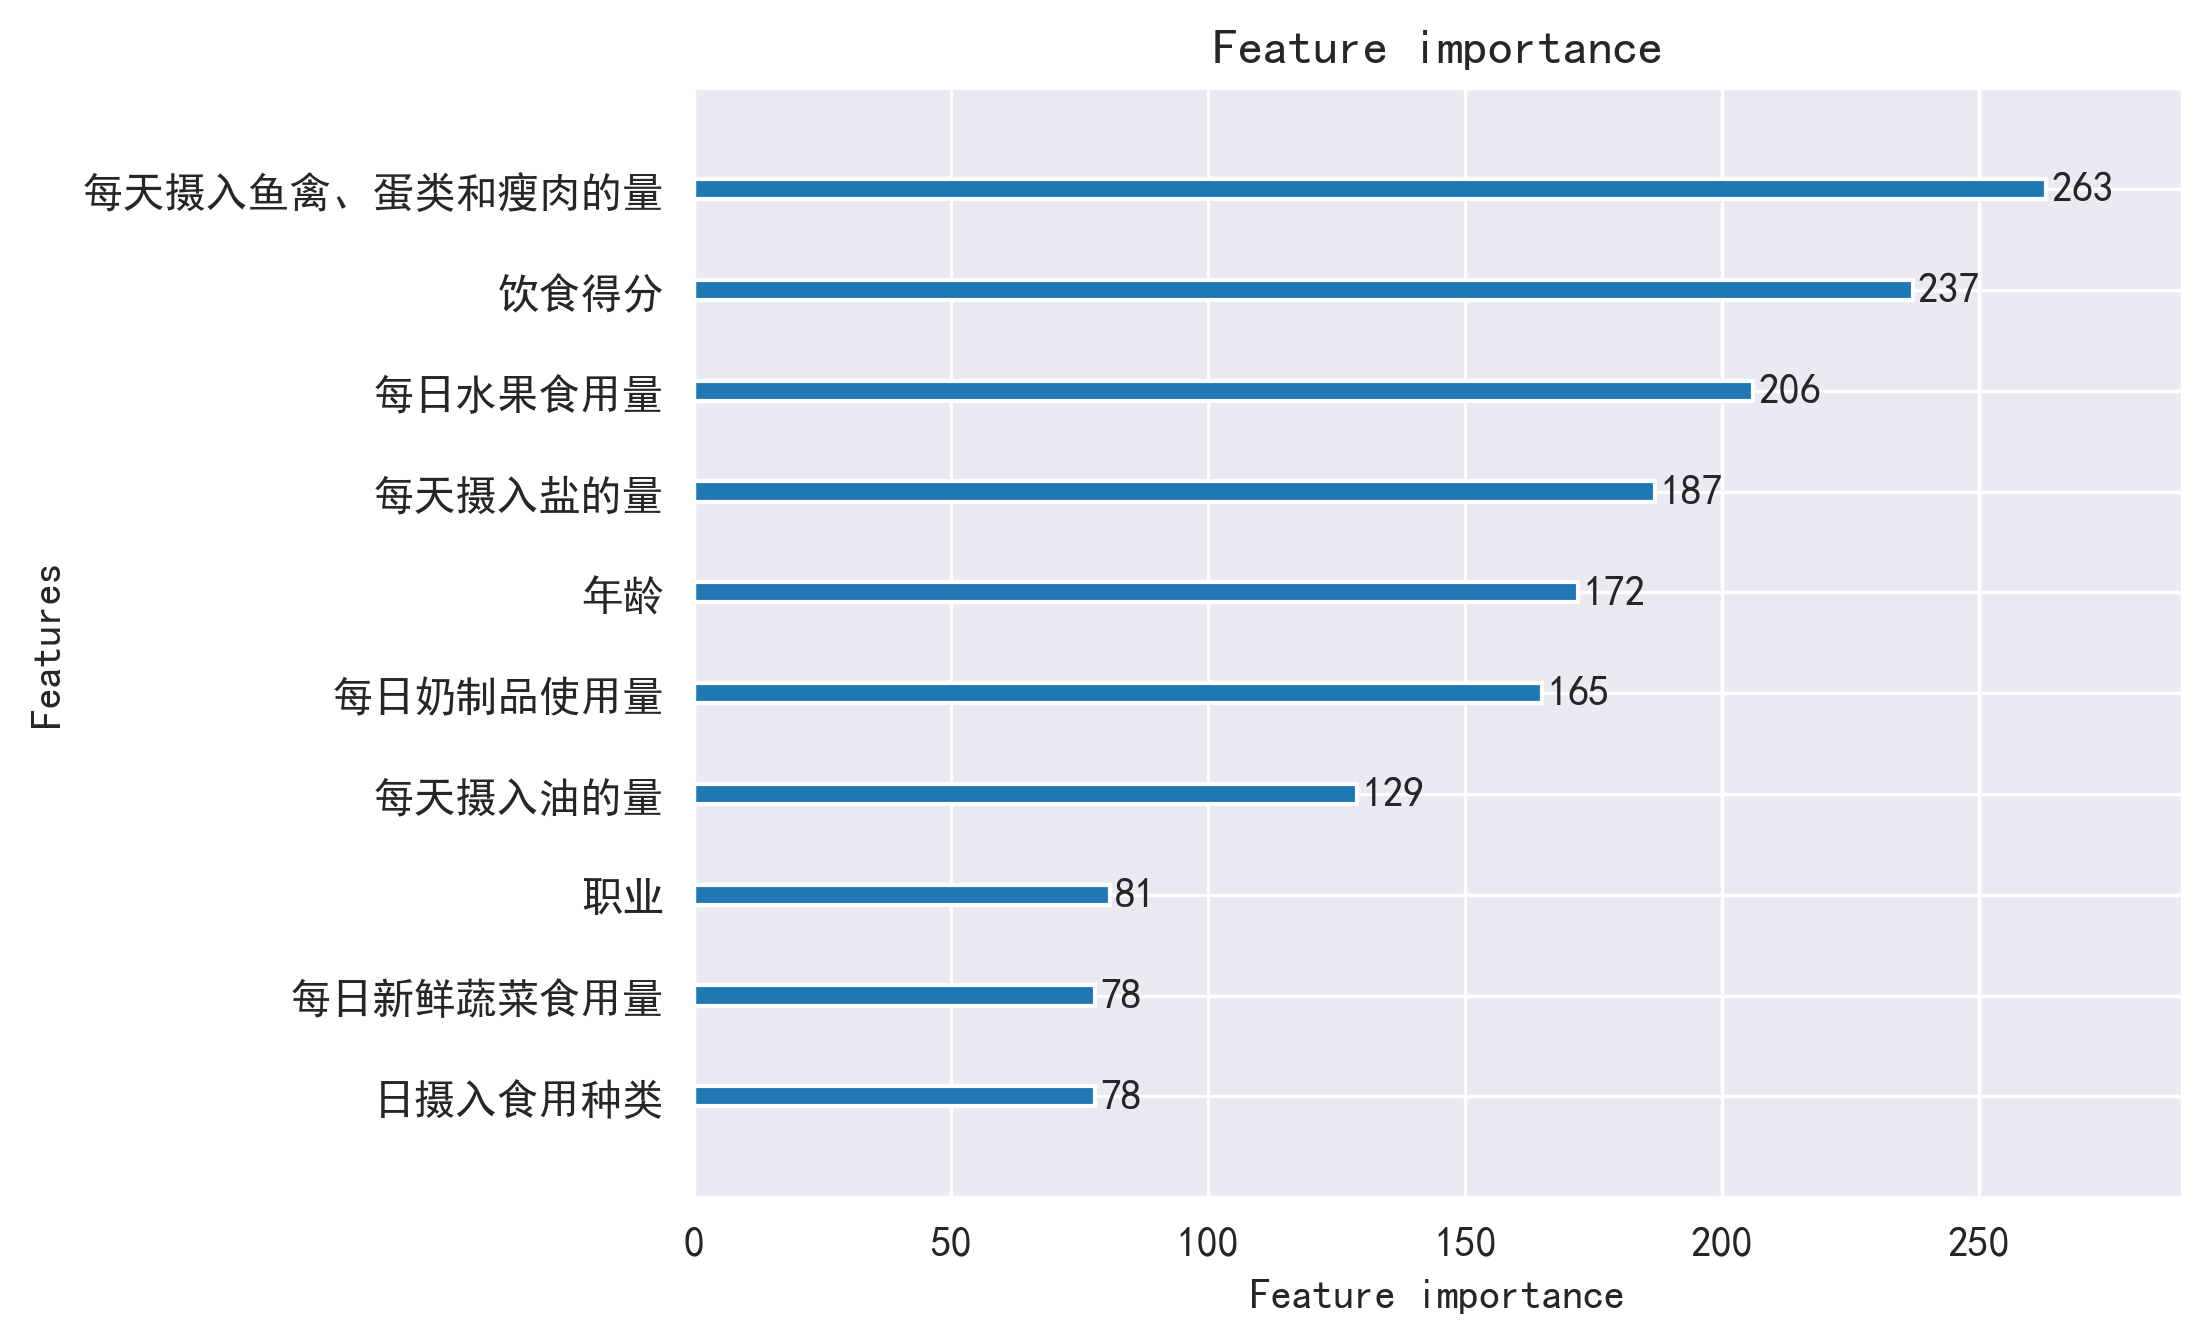

In [336]:


"""
尝试着用lgb画一下特征重要性
"""
data1 = data.drop(['您有没有被社区或以上医院的医生诊断患有糖尿病','文化程度','婚姻状况'],axis=1)
# 导入lgb
import lightgbm as lgb
# 因变量为有没有被社区或以上医院的医生诊断过患有高血压,其他为自变量 计算特征重要性
y = data1['有没有被社区或以上医院的医生诊断过患有高血压']
x = data1.drop(['有没有被社区或以上医院的医生诊断过患有高血压'],axis=1)
lgb_train = lgb.Dataset(x,y)
params = {
    'boosting_type':'gbdt',
    'objective':'binary',
    'metric':'auc',
    'num_leaves':64,
    'learning_rate':0.01,
    'feature_fraction':0.9,
    'bagging_fraction':0.8,
    'bagging_freq':5,
    'verbose':-1,
    'lambda_l1':1,
    'lambda_l2':1,
    'min_child_weight':1
}
cv_results = lgb.cv(
    params,
    lgb_train,
    seed=2018,
    nfold=5,
    metrics=['auc'],
    early_stopping_rounds=10,
    verbose_eval=True
)
# 绘制特征重要性
lgb_model = lgb.train(
    params,
    lgb_train,
    num_boost_round=len(cv_results['auc-mean'])
)
lgb.plot_importance(lgb_model,max_num_features=10)
plt.show()

229


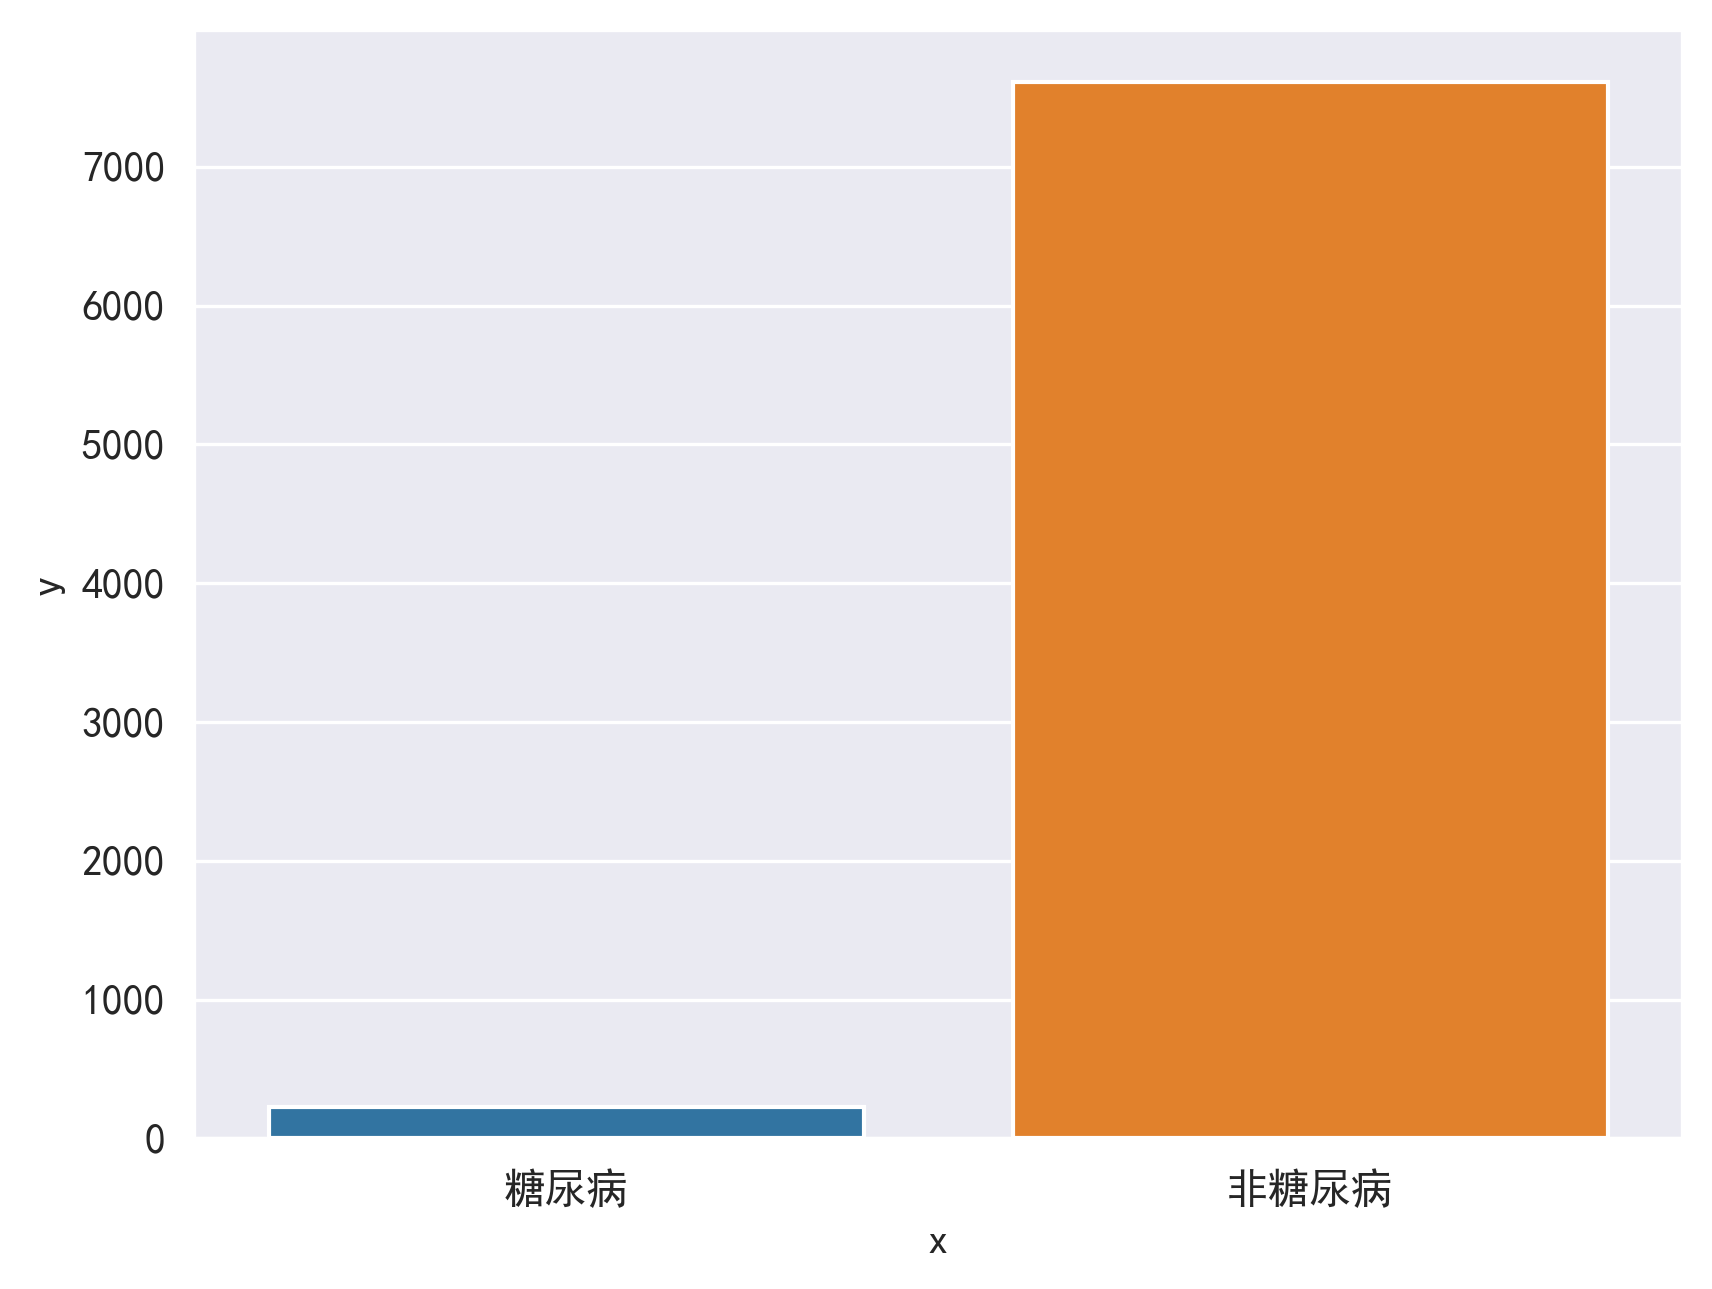

In [337]:
"""
绘制糖尿病和高血压的人数
"""
# 遍历您有没有被社区或以上医院的医生诊断患有糖尿病这一列,统计1的个数
count = 0
all = 7836
for i in data['您有没有被社区或以上医院的医生诊断患有糖尿病']:
    if i == 1:
        count += 1
print(count)
x = ['糖尿病','非糖尿病']
y = [count,all-count]
# 将x和y转换为dataframe
data2 = pd.DataFrame({'x':x,'y':y})
# 绘制柱状图
sns.barplot(x='x',y='y',data=data2)
plt.show()


C:\Users\44279\AppData\Local\Temp\ipykernel_29592\3500649796.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3.rename(columns={'有没有被社区或以上医院的医生诊断过患有高血压':'高血压'},inplace=True)


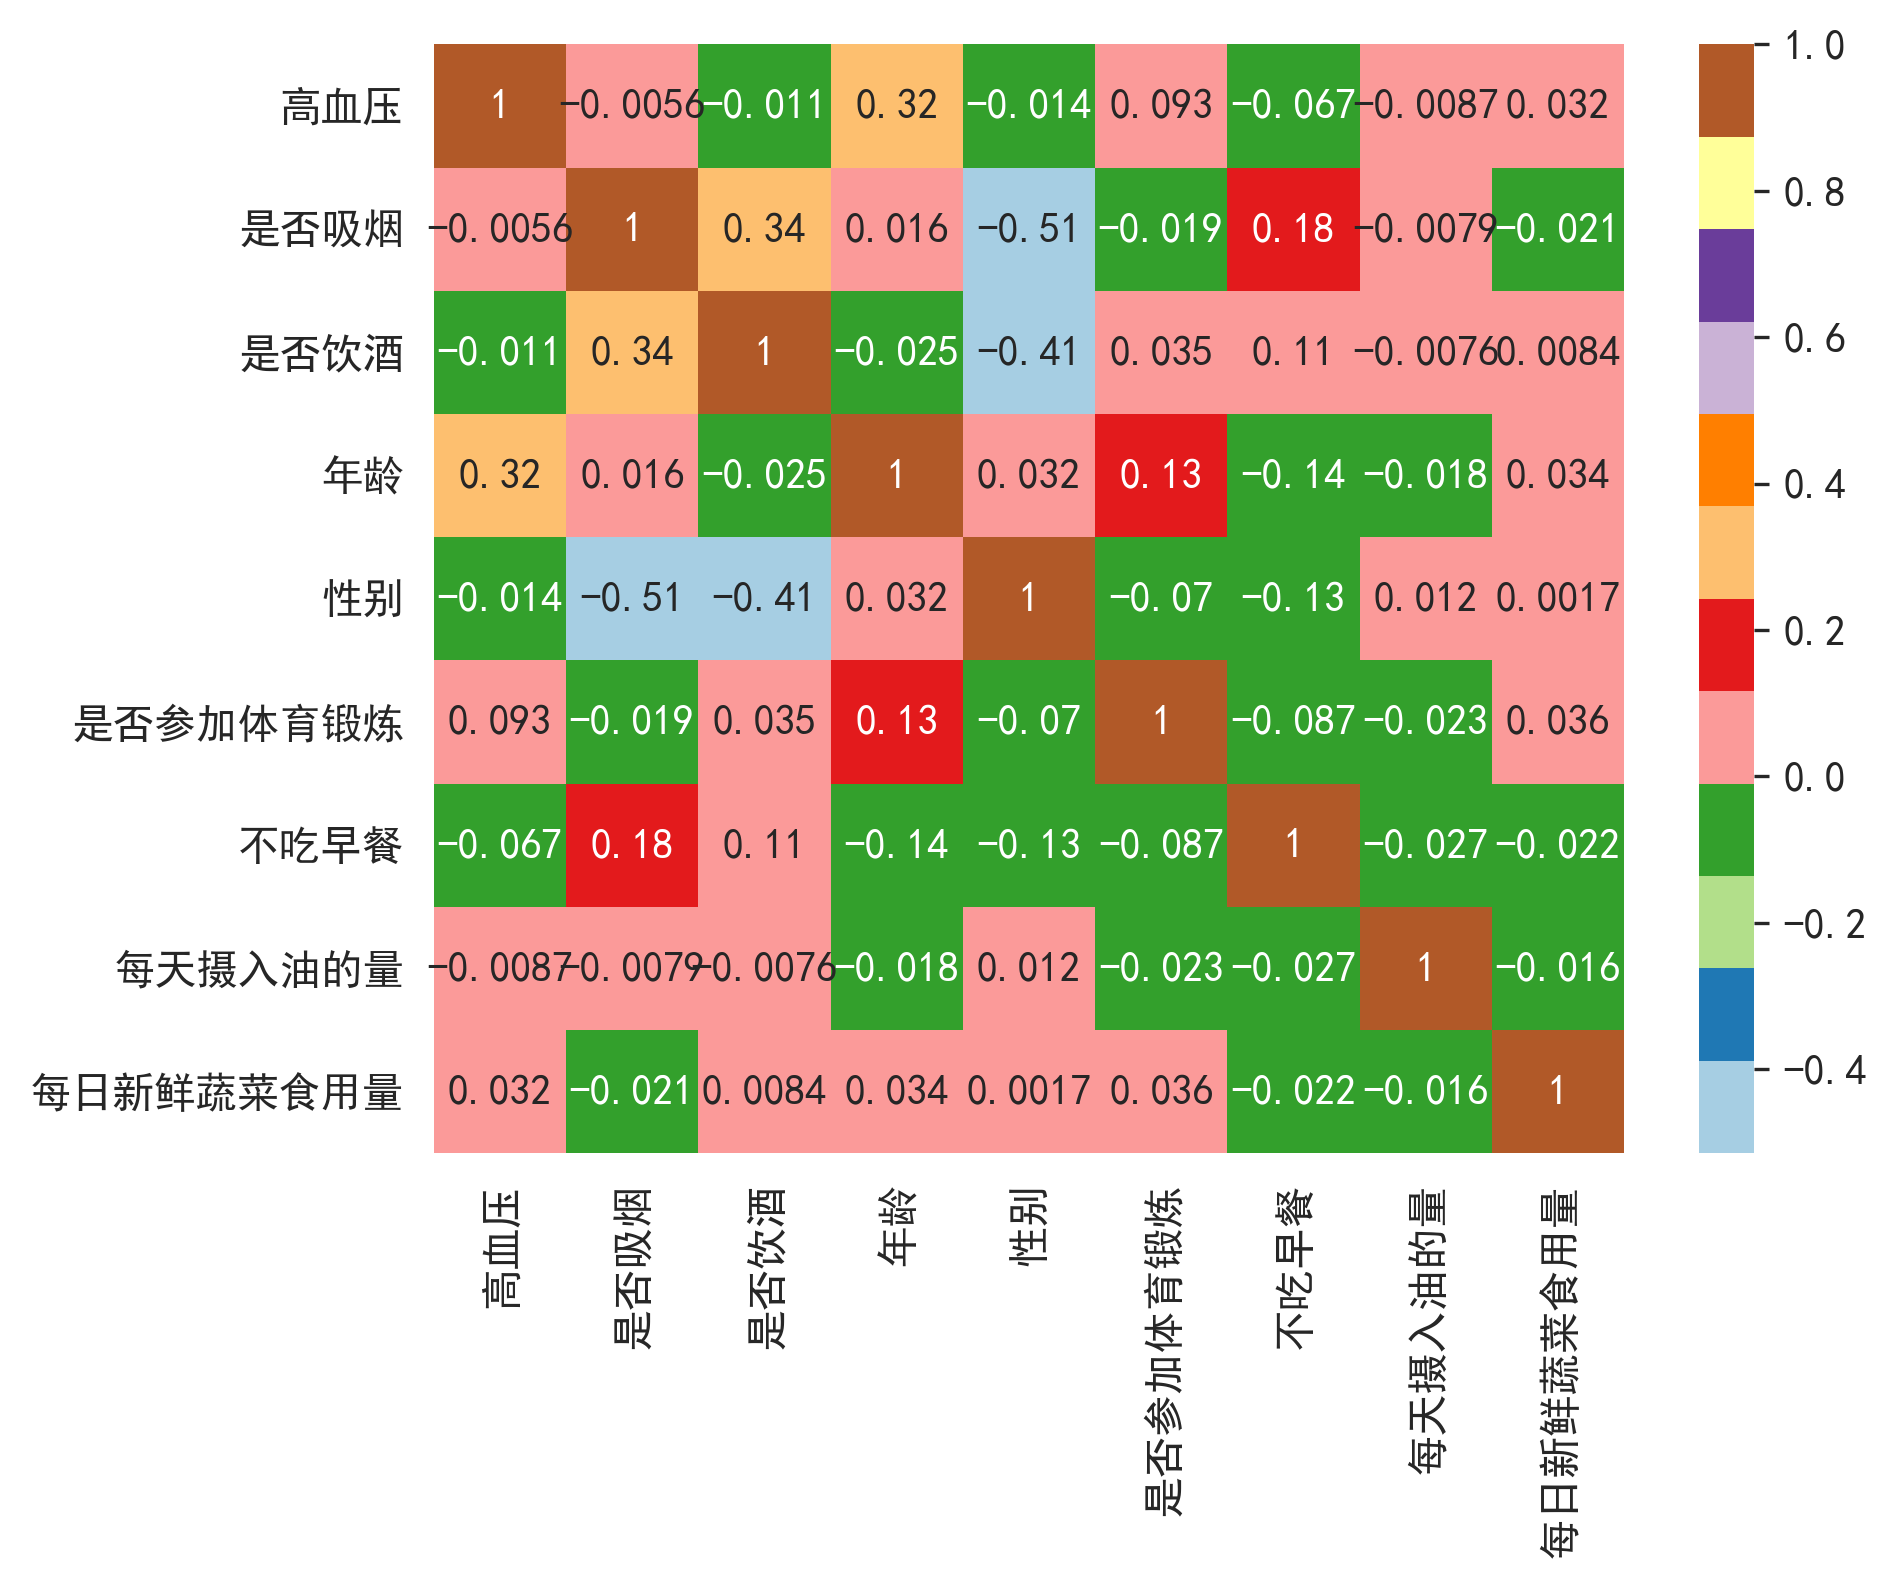

In [338]:
"""
计算高血压与其他关系的斯皮尔曼系数
"""
data
data3 = data[['有没有被社区或以上医院的医生诊断过患有高血压','是否吸烟','是否饮酒','年龄','性别','是否参加体育锻炼','不吃早餐','每天摄入油的量','每日新鲜蔬菜食用量']]
# 修改列名
data3.rename(columns={'有没有被社区或以上医院的医生诊断过患有高血压':'高血压'},inplace=True)
# 计算斯皮尔曼系数
data3.corr(method='spearman')
# 绘制热力图
sns.heatmap(data3.corr(method='spearman'),annot=True,cmap="Paired")
plt.show()

C:\Users\44279\AppData\Local\Temp\ipykernel_29592\3081298509.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4.rename(columns={'您有没有被社区或以上医院的医生诊断患有糖尿病':'糖尿病'},inplace=True)


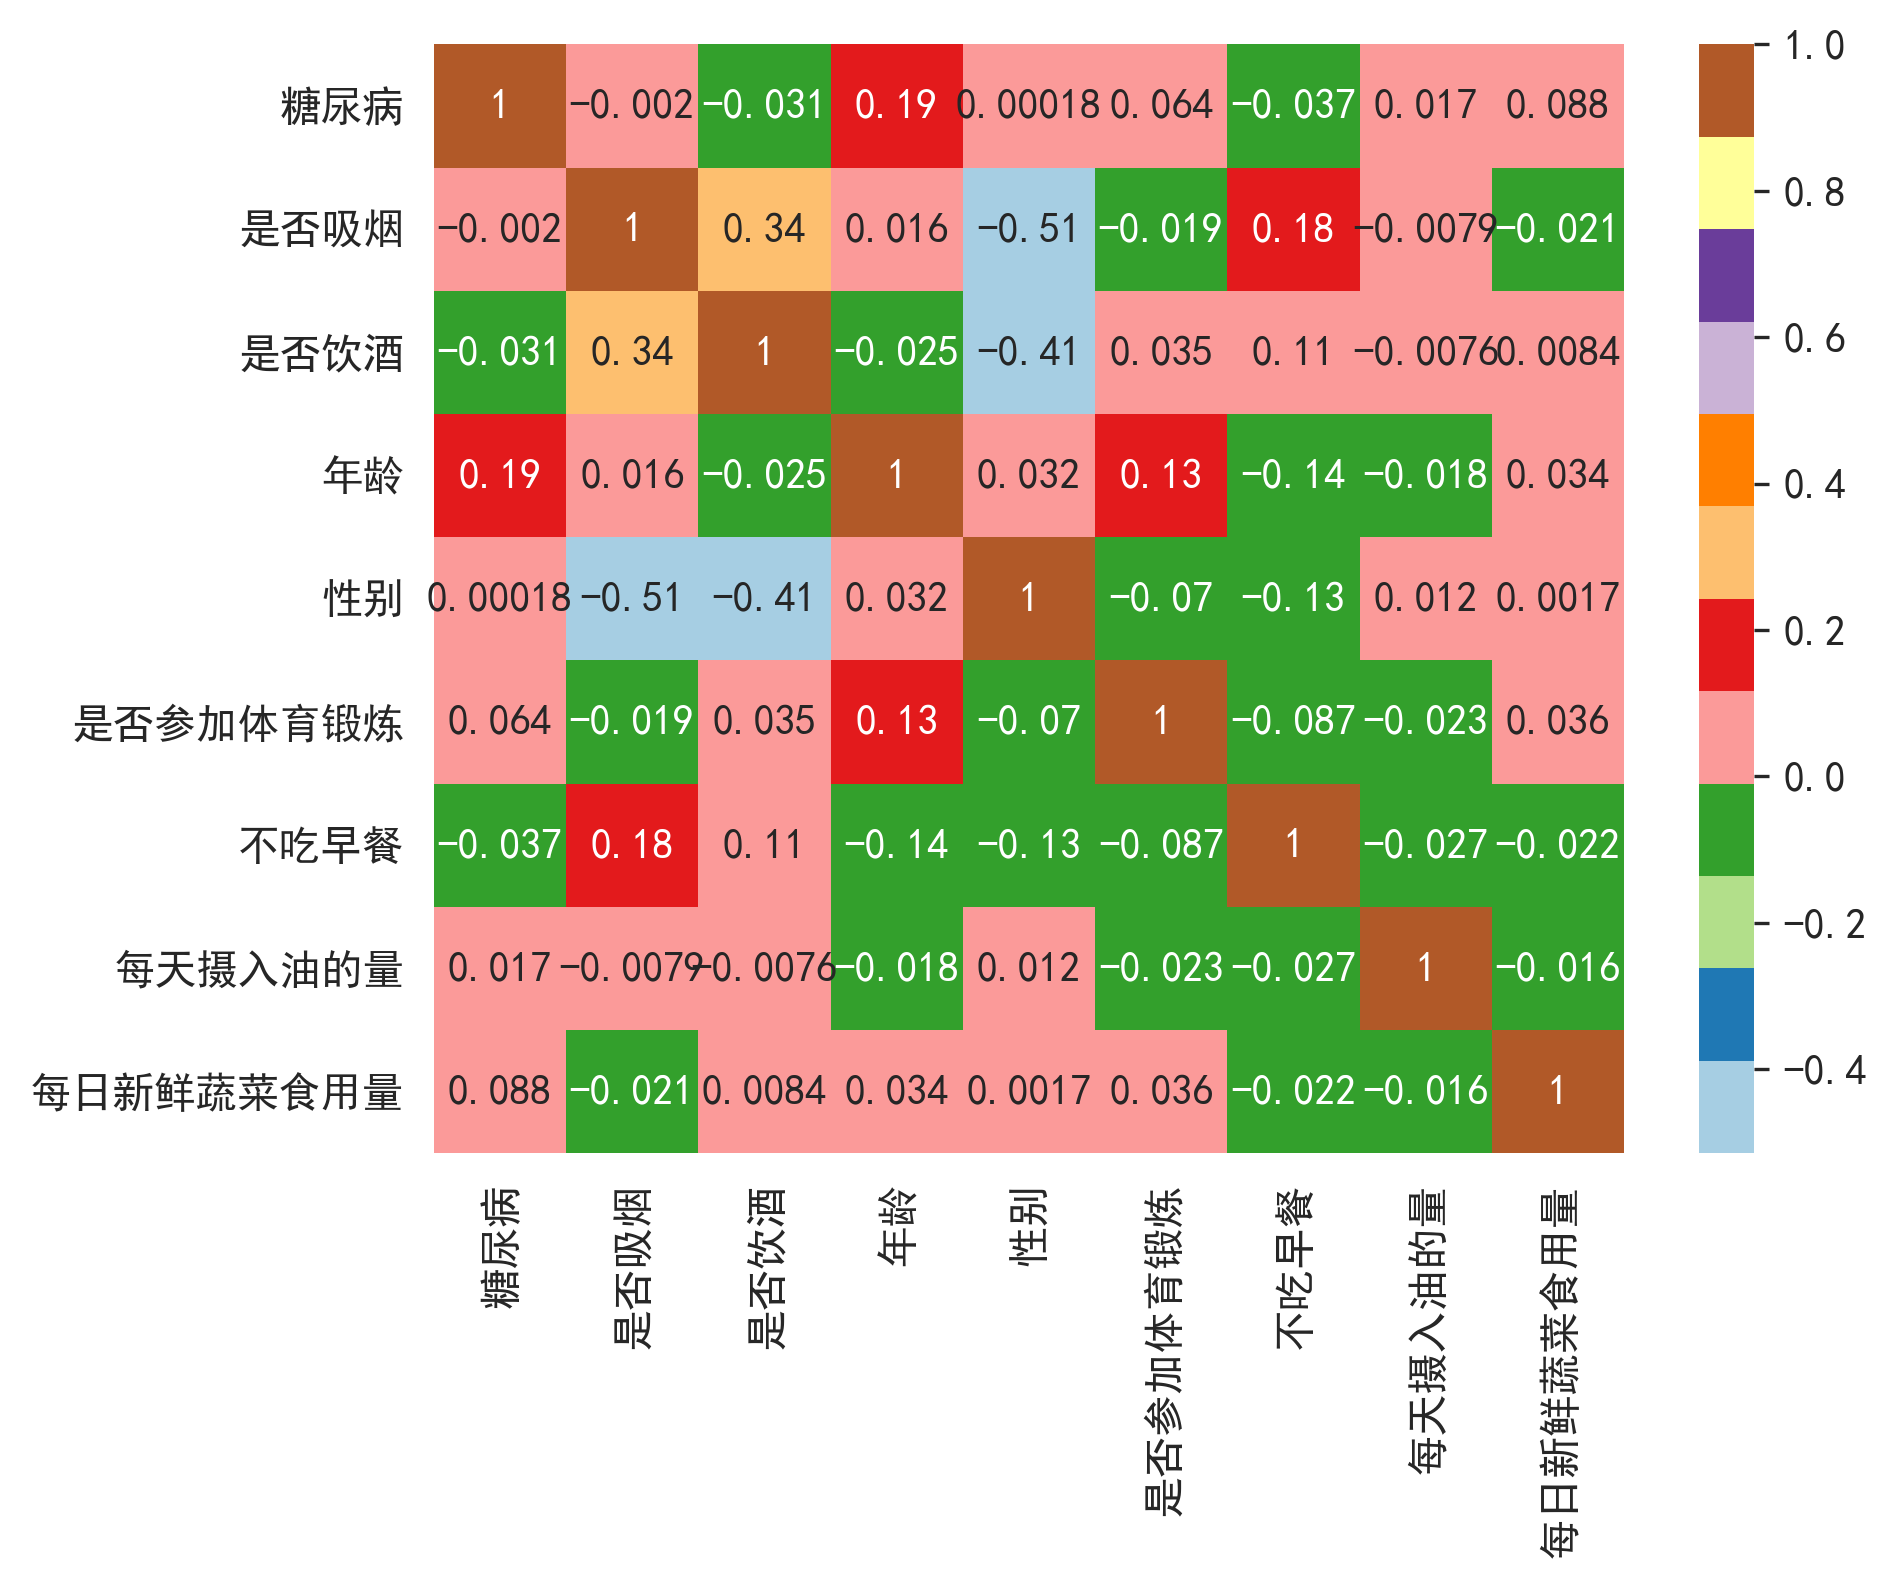

In [339]:
"""
计算糖尿病与其他关系的斯皮尔曼系数
"""
data4 = data[['您有没有被社区或以上医院的医生诊断患有糖尿病','是否吸烟','是否饮酒','年龄','性别','是否参加体育锻炼','不吃早餐','每天摄入油的量','每日新鲜蔬菜食用量']]
# 修改列名
data4.rename(columns={'您有没有被社区或以上医院的医生诊断患有糖尿病':'糖尿病'},inplace=True)
# 计算斯皮尔曼系数
data4.corr(method='spearman')
# 绘制热力图
sns.heatmap(data4.corr(method='spearman'),annot=True,cmap="Paired")
plt.show()


In [340]:
# 修改列名 有没有被社区或以上医院的医生诊断过患有高血压 您有没有被社区或以上医院的医生诊断患有糖尿病
data.rename(columns={'有没有被社区或以上医院的医生诊断过患有高血压':'高血压','您有没有被社区或以上医院的医生诊断患有糖尿病':'糖尿病'},inplace=True)
data

,是否吸烟,是否饮酒,年龄,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃中餐,在家吃晚餐,...,每日水果食用量,每日奶制品使用量,每天摄入鱼禽、蛋类和瘦肉的量,每天摄入油的量,每天摄入盐的量,是否吃小麦面粉,是否吃薯类,是否吃油炸面食,是否吃内脏类,是否吃豆浆
0,0.0,0.0,72,2,4,2.0,11.0,0.0,7.0,7.0,...,1000.000000,171.000000,62.857143,6.0,10.0,1.0,1.0,0.0,0.0,1.0
1,0.0,0.0,73,2,2,2.0,1.0,0.0,7.0,7.0,...,300.000000,285.714286,147.857143,7.0,15.0,1.0,1.0,0.0,0.0,1.0
2,1.0,1.0,79,2,3,2.0,11.0,0.0,7.0,7.0,...,28.571429,35.714286,184.142857,6.0,20.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,78,2,2,2.0,11.0,0.0,7.0,7.0,...,100.000000,400.000000,207.142857,8.0,6.0,1.0,1.0,0.0,1.0,1.0
4,1.0,1.0,62,2,4,2.0,1.0,0.0,2.0,6.0,...,14.285714,0.000000,47.142857,3.0,5.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7831,1.0,1.0,44,1,3,2.0,4.0,0.0,7.0,7.0,...,100.000000,192.857143,124.285714,10.0,12.0,1.0,1.0,0.0,0.0,1.0
7832,0.0,0.0,67,2,3,2.0,1.0,1.0,7.0,7.0,...,400.000000,107.142857,462.857143,15.0,20.0,1.0,1.0,0.0,0.0,1.0
7833,1.0,1.0,54,1,3,2.0,2.0,0.0,7.0,7.0,...,300.000000,107.142857,425.971429,5.0,10.0,0.0,1.0,0.0,0.0,1.0
7834,0.0,1.0,57,1,4,2.0,12.0,0.0,5.0,6.0,...,500.000000,321.428571,232.971429,4.0,10.0,1.0,1.0,0.0,1.0,0.0


C:\Users\44279\PycharmProjects\pythonproject\venv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Variable 是否吸烟 coefficient: -0.1061
Variable 是否饮酒 coefficient: 0.0439
Variable 年龄 coefficient: 1.1933
Variable 性别 coefficient: -0.1855
Variable 不吃早餐 coefficient: -0.1000
Variable 在家吃中餐 coefficient: 0.0866
Variable 在家吃晚餐 coefficient: -0.1001
Variable 是否参加体育锻炼 coefficient: 0.0590
Variable 体育锻炼的强度 coefficient: 0.0349
Variable 饮食得分 coefficient: 0.0380
Variable 平均每天体育锻炼时间 coefficient: -0.0305
Variable 日摄入食用种类 coefficient: -0.0903
Variable 每日新鲜蔬菜食用量 coefficient: 0.1354
Variable 每日水果食用量 coefficient: -0.1660
Variable 每日奶制品使用量 coefficient: 0.0353
Variable 每天摄入鱼禽、蛋类和瘦肉的量 coefficient: 0.0022
Variable 每天摄入油的量 coefficient: -0.0920
Variable 每天摄入盐的量 coefficient: 0.0867
Variable 是否吃小麦面粉 coefficient: -0.0509
Variable 是否吃薯类 coefficient: 0.0936
Variable 是否吃油炸面食 coefficient: 0.0593
Variable 是否吃内脏类 coefficient: 0.0163
Variable 是否吃豆浆 coefficient: 0.0558


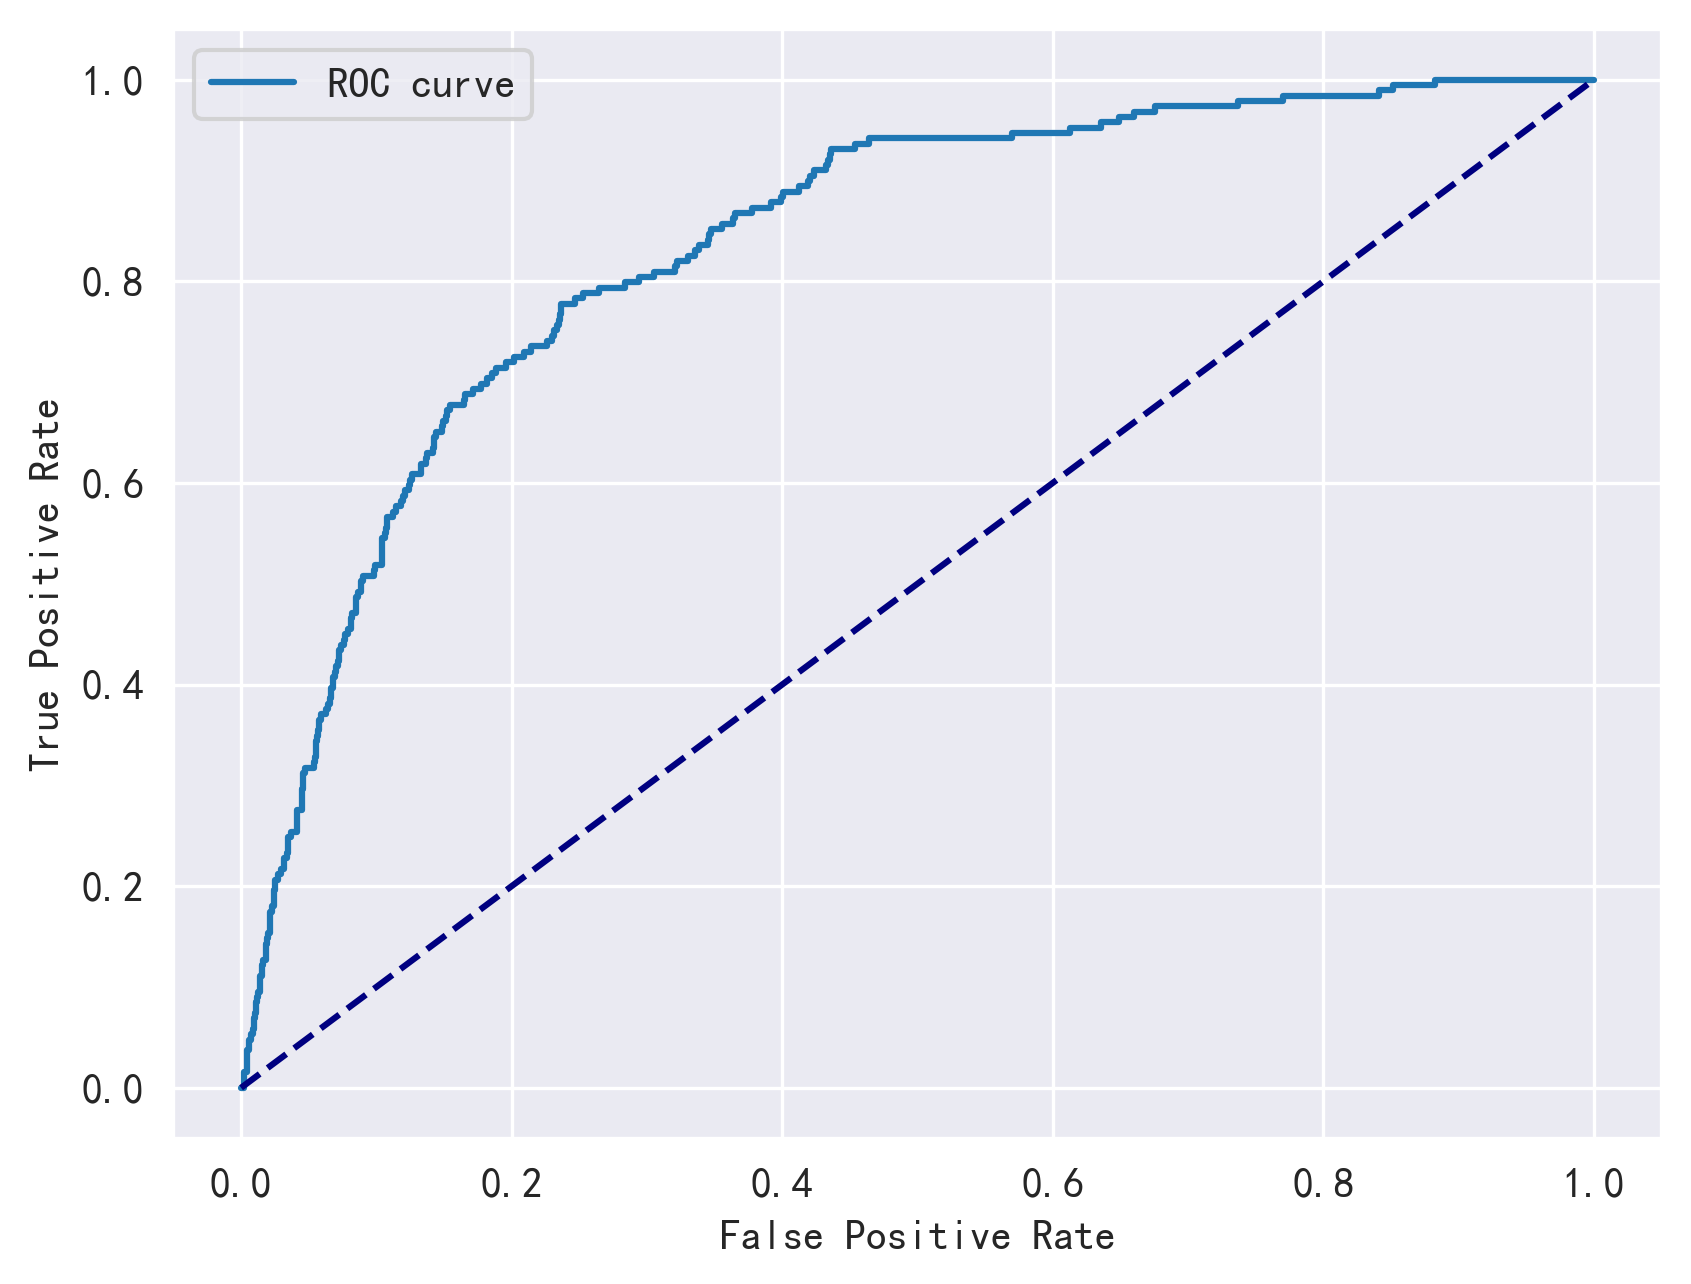

In [341]:
"""
高血压和糖尿病这两列作为因变量,其他列作为自变量,进行逻辑回归
"""
# 导入逻辑回归
from sklearn.linear_model import LogisticRegression
# 导入交叉验证
from sklearn.model_selection import cross_val_score
# 先删除data中带有缺失值项的行
data.dropna(axis=0,how='any',inplace=True)
Y1 = data[['高血压']].values
Y2 = data[['糖尿病']].values
data_new = data.drop(['高血压','糖尿病','文化程度','婚姻状况','职业'],axis=1)
# 对data_new进行标准化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(data_new)

# 将数据分为训练集和测试集
from sklearn.model_selection import train_test_split
# 先分析高血压
X_train,X_test,Y1_train,Y1_test = train_test_split(X,Y1,test_size=0.3,random_state=42)
# 实例化逻辑回归
model = LogisticRegression()
model.fit(X_train,Y1_train)
# 输出变量的系数
coefficients = model.coef_[0]
intercept = model.intercept_[0]
for i, coef in enumerate(coefficients):
    print(f'Variable {data_new.columns[0:][i]} coefficient: {coef:.4f}')

# 预测测试集
Y1_pred = model.predict_proba(X_test)[:,1]
# 计算ROC AUC
from sklearn.metrics import roc_auc_score
# 绘制ROC曲线
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y1_test, Y1_pred)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()



C:\Users\44279\PycharmProjects\pythonproject\venv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Variable 是否吸烟 coefficient: -0.0018
Variable 是否饮酒 coefficient: -0.2425
Variable 年龄 coefficient: 1.0109
Variable 性别 coefficient: -0.1914
Variable 不吃早餐 coefficient: -0.0444
Variable 在家吃中餐 coefficient: 0.1741
Variable 在家吃晚餐 coefficient: -0.1824
Variable 是否参加体育锻炼 coefficient: 0.1714
Variable 体育锻炼的强度 coefficient: -0.0214
Variable 饮食得分 coefficient: 0.0476
Variable 平均每天体育锻炼时间 coefficient: -0.0008
Variable 日摄入食用种类 coefficient: 0.0439
Variable 每日新鲜蔬菜食用量 coefficient: 0.2005
Variable 每日水果食用量 coefficient: 0.0477
Variable 每日奶制品使用量 coefficient: 0.0529
Variable 每天摄入鱼禽、蛋类和瘦肉的量 coefficient: -0.0652
Variable 每天摄入油的量 coefficient: 0.1801
Variable 每天摄入盐的量 coefficient: -0.7796
Variable 是否吃小麦面粉 coefficient: -0.0374
Variable 是否吃薯类 coefficient: 0.0472
Variable 是否吃油炸面食 coefficient: 0.2240
Variable 是否吃内脏类 coefficient: -0.1410
Variable 是否吃豆浆 coefficient: -0.0153


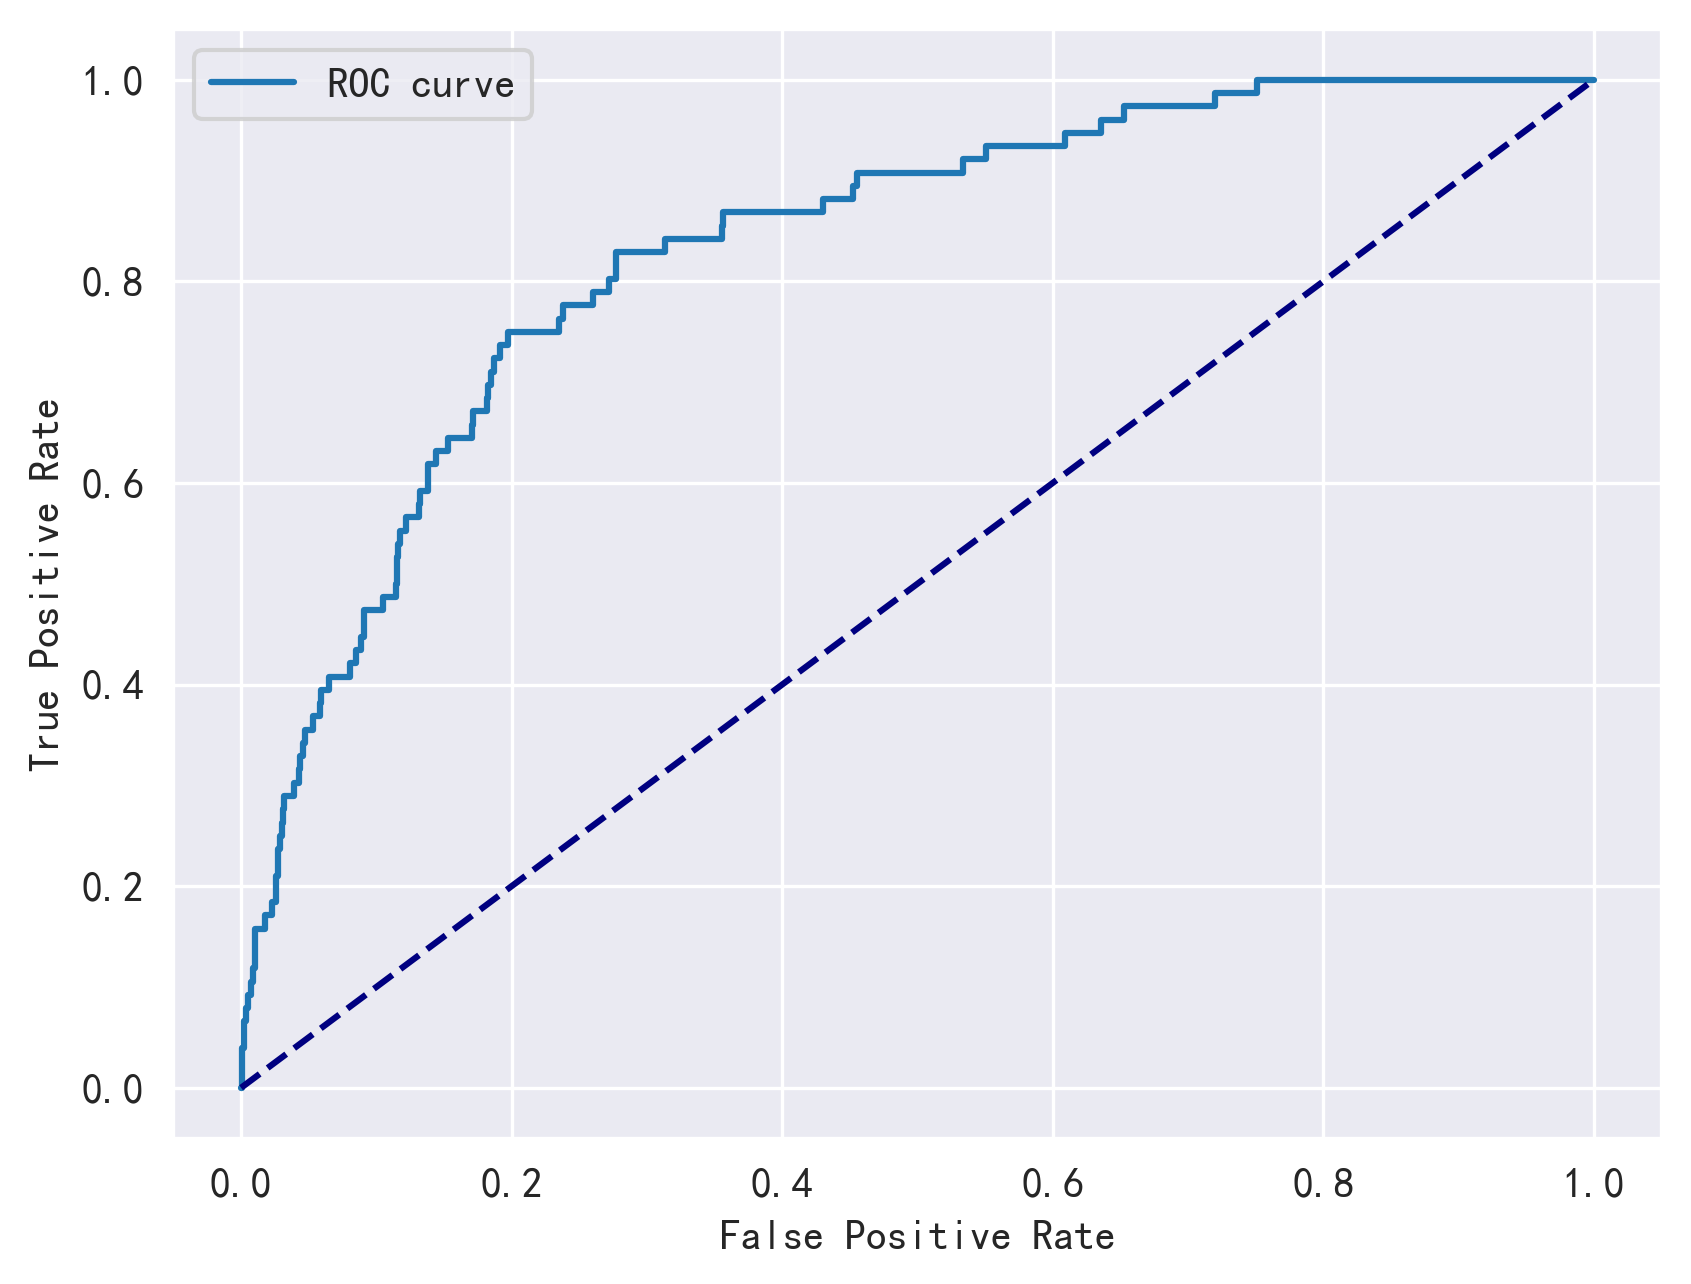

In [342]:
"""
高血压和糖尿病这两列作为因变量,其他列作为自变量,进行逻辑回归
"""
# 导入逻辑回归
from sklearn.linear_model import LogisticRegression
# 导入交叉验证
from sklearn.model_selection import cross_val_score
# 先删除data中带有缺失值项的行
data.dropna(axis=0,how='any',inplace=True)
Y1 = data[['高血压']].values
Y2 = data[['糖尿病']].values
data_new = data.drop(['高血压','糖尿病','文化程度','婚姻状况','职业'],axis=1)
# 对data_new进行标准化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(data_new)

# 将数据分为训练集和测试集
from sklearn.model_selection import train_test_split
# 先分析高血压
X_train,X_test,Y1_train,Y1_test = train_test_split(X,Y2,test_size=0.3,random_state=42)
# 实例化逻辑回归
model = LogisticRegression()
model.fit(X_train,Y1_train)
# 输出变量的系数
coefficients = model.coef_[0]
intercept = model.intercept_[0]
for i, coef in enumerate(coefficients):
    print(f'Variable {data_new.columns[0:][i]} coefficient: {coef:.4f}')

# 预测测试集
Y1_pred = model.predict_proba(X_test)[:,1]
# 计算ROC AUC
from sklearn.metrics import roc_auc_score
# 绘制ROC曲线
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y1_test, Y1_pred)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

